In [50]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import warnings
from scipy.stats import boxcox

In [15]:
df= pd.read_csv("C:/Users/ABHISHEK DEORE/OneDrive/Desktop/Projects/Rock VS Mine Prediction/Data/SonarData.csv", header = None)


In [17]:
# Set display options to show all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [18]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [19]:
df.shape

(208, 61)

In [21]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,0.236013,0.250221,0.273305,0.296568,0.320201,0.378487,0.415983,0.452318,0.504812,0.563047,0.609060,0.624275,0.646975,0.672654,0.675424,0.699866,0.702155,0.694024,0.642074,0.580928,0.504475,0.439040,0.417220,0.403233,0.392571,0.384848,0.363807,0.339657,0.325800,0.311207,0.289252,0.278293,0.246542,0.214075,0.197232,0.160631,0.122453,0.091424,0.051929,0.020424,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,0.132705,0.140072,0.140962,0.164474,0.205427,0.232650,0.263677,0.261529,0.257988,0.262653,0.257818,0.255883,0.250175,0.239116,0.244926,0.237228,0.245657,0.237189,0.240250,0.220749,0.213992,0.213237,0.206513,0.231242,0.259132,0.264121,0.239912,0.212973,0.199075,0.178662,0.171111,0.168728,0.138993,0.133291,0.151628,0.133938,0.086953,0.062417,0.035954,0.013665,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,0.028900,0.023600,0.018400,0.027300,0.003100,0.016200,0.034900,0.037500,0.049400,0.065600,0.051200,0.021900,0.056300,0.023900,0.024000,0.092100,0.048100,0.028400,0.014400,0.061300,0.048200,0.040400,0.047700,0.021200,0.022300,0.008000,0.035100,0.038300,0.037100,0.011700,0.036000,0.005600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,0.129250,0.133475,0.166125,0.175175,0.164625,0.196300,0.205850,0.242075,0.299075,0.350625,0.399725,0.406925,0.450225,0.540725,0.525800,0.544175,0.531900,0.534775,0.463700,0.411400,0.345550,0.281400,0.257875,0.217575,0.179375,0.154350,0.160100,0.174275,0.173975,0.186450,0.163100,0.158900,0.155200,0.126875,0.094475,0.068550,0.064250,0.045125,0.026350,0.011550,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,0.224800,0.249050,0.263950,0.281100,0.281700,0.304700,0.308400,0.368300,0.434950,0.542500,0.617700,0.664900,0.699700,0.698500,0.721100,0.754500,0.745600,0.731900,0.680800,0.607150,0.490350,0.429600,0.391200,0.351050,0.312750,0.321150,0.306300,0.312700,0.283500,0.278050,0.259500,0.245100,0.222550,0.177700,0.148000,0.121350,0.101650,0.078100,0.044700,0.017900,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,0.301650,0.331250,0.351250,0.386175,0.452925,0.535725,0.659425,0.679050,0.731400,0.809325,0.816975,0.831975,0.848575,0.872175,0.873725,0.893800,0.917100,0.900275,0.852125,0.735175,0.641950,0.580300,0.556125,0.596125,0.593350,0.556525,0.518900,0.440550,0.434900,0.424350,0.387525,0.384250,0.324525,0.271750,0.231550,0.200375,0.154425,0.120100,0.0685

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

In [27]:
df[60].value_counts()

60
M    111
R     97
Name: count, dtype: int64

In [28]:
X=df.drop(columns=60,axis=1)
Y=df[60]
print(X)
print(Y)

         0       1       2       3       4       5       6       7       8   \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
207  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

         9       10      11      12      13      14

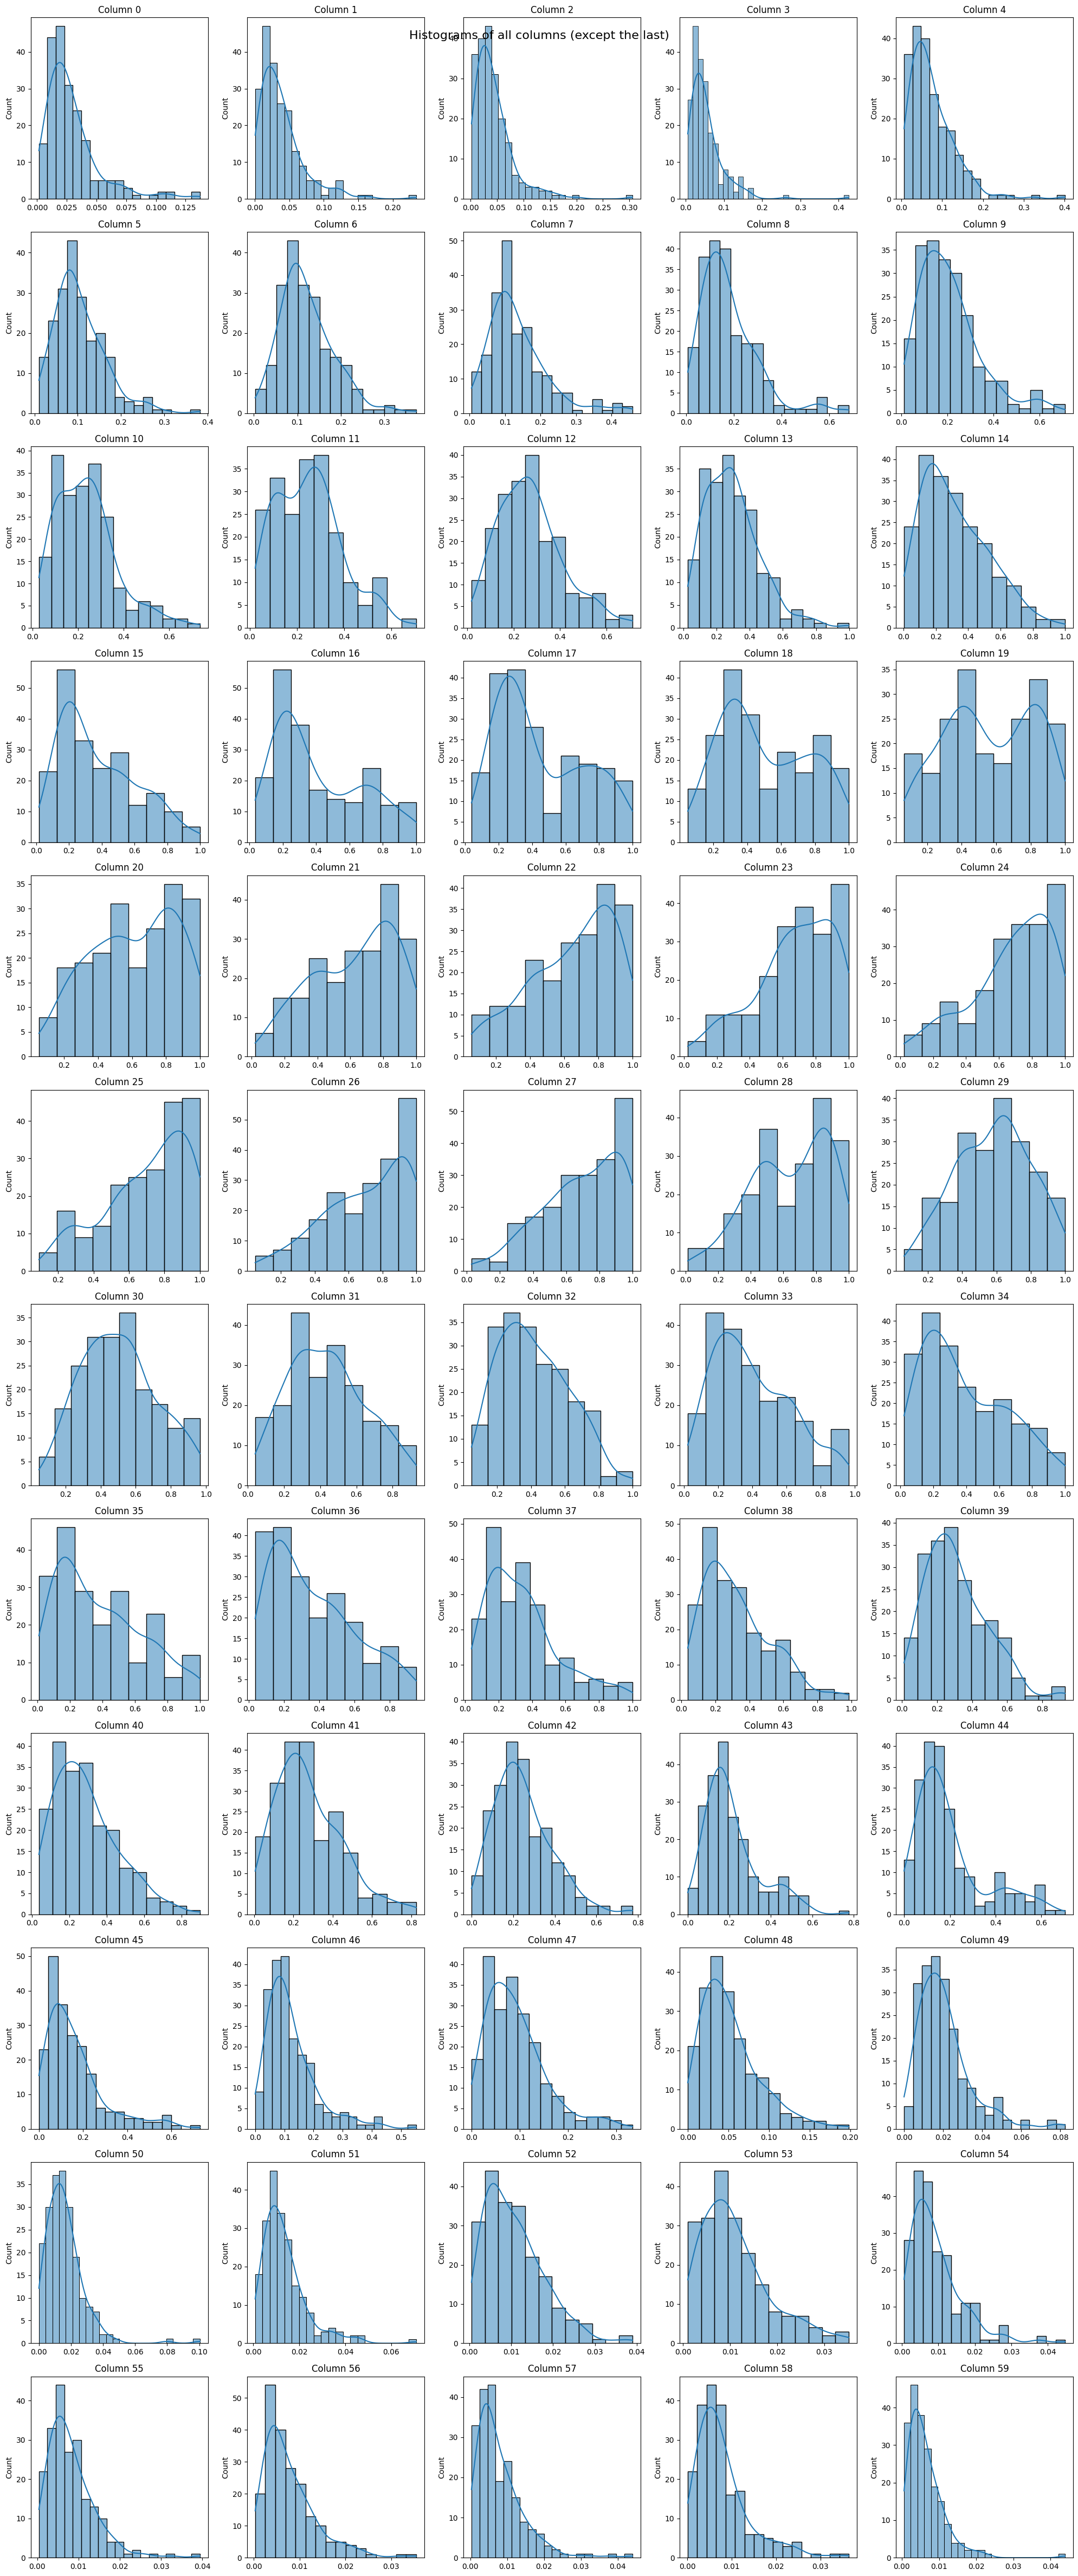

In [40]:
def plot_all_histograms(df):
     # Exclude the last column
    columns_to_plot = df.columns[:-1]
    n_columns = len(columns_to_plot)
    
    # Calculate the grid size
    n_rows = math.ceil(n_columns / 5)  # 5 plots per row
    
    # Set up the matplotlib figure
    fig, axes = plt.subplots(n_rows, 5, figsize=(20, 4*n_rows))
    fig.suptitle('Histograms of all columns (except the last)', fontsize=16)
    
    # Flatten the axes array for easier indexing
    axes = axes.flatten()
    
    # Create a histogram for each column except the last
    for i, column in enumerate(columns_to_plot):
        sns.histplot(data=df, x=column, ax=axes[i], kde=True)
        axes[i].set_title(f'Column {column}')
        axes[i].set_xlabel('')  # Remove x-label to save space
        
    # Remove any unused subplots
    for i in range(n_columns, len(axes)):
        fig.delaxes(axes[i])
    
    plt.tight_layout()
    plt.show()


# Assuming your DataFrame is named df
plot_all_histograms(df)

In [41]:
#Training and Test data
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=1)
print(X.shape,X_train.shape,X_test.shape)

(208, 60) (187, 60) (21, 60)


In [42]:
#Logistic Regression Model
model=LogisticRegression()

In [43]:
#Training the LogisticRegression model with training data
model.fit(X_train,Y_train) 

LogisticRegression()

In [44]:
#Accuracy on training data
X_train_prediction=model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)
print("The accuracy on training data:" ,training_data_accuracy)

The accuracy on training data: 0.8342245989304813


In [45]:
#Accuracy on test data
X_test_prediction=model.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)
print("The accuracy on test data:" ,test_data_accuracy)

The accuracy on test data: 0.7619047619047619


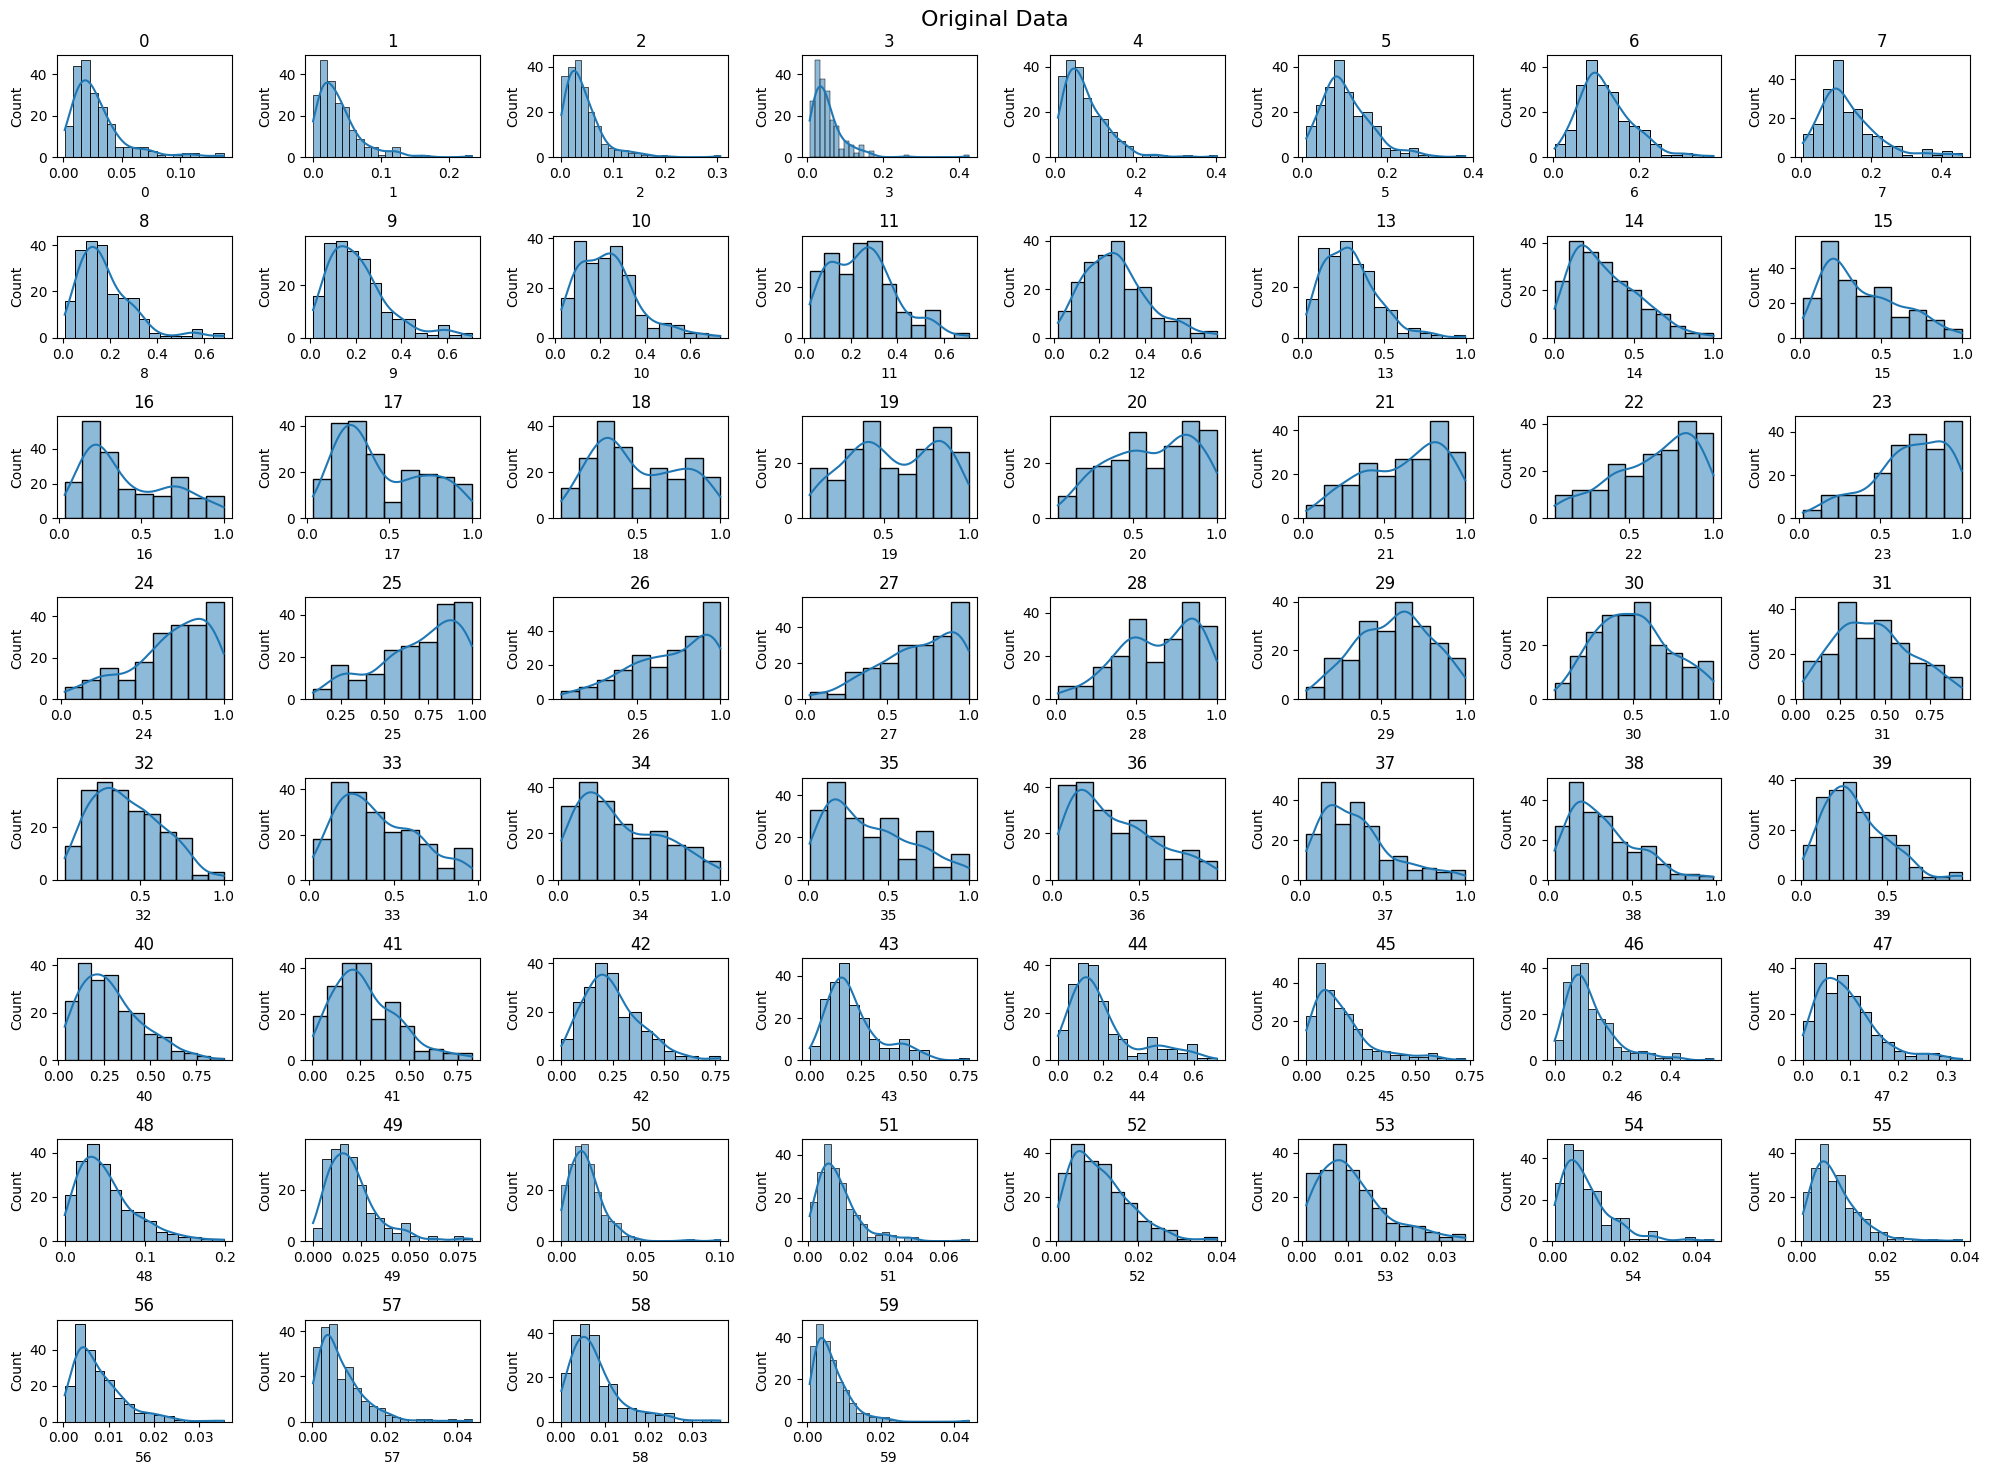

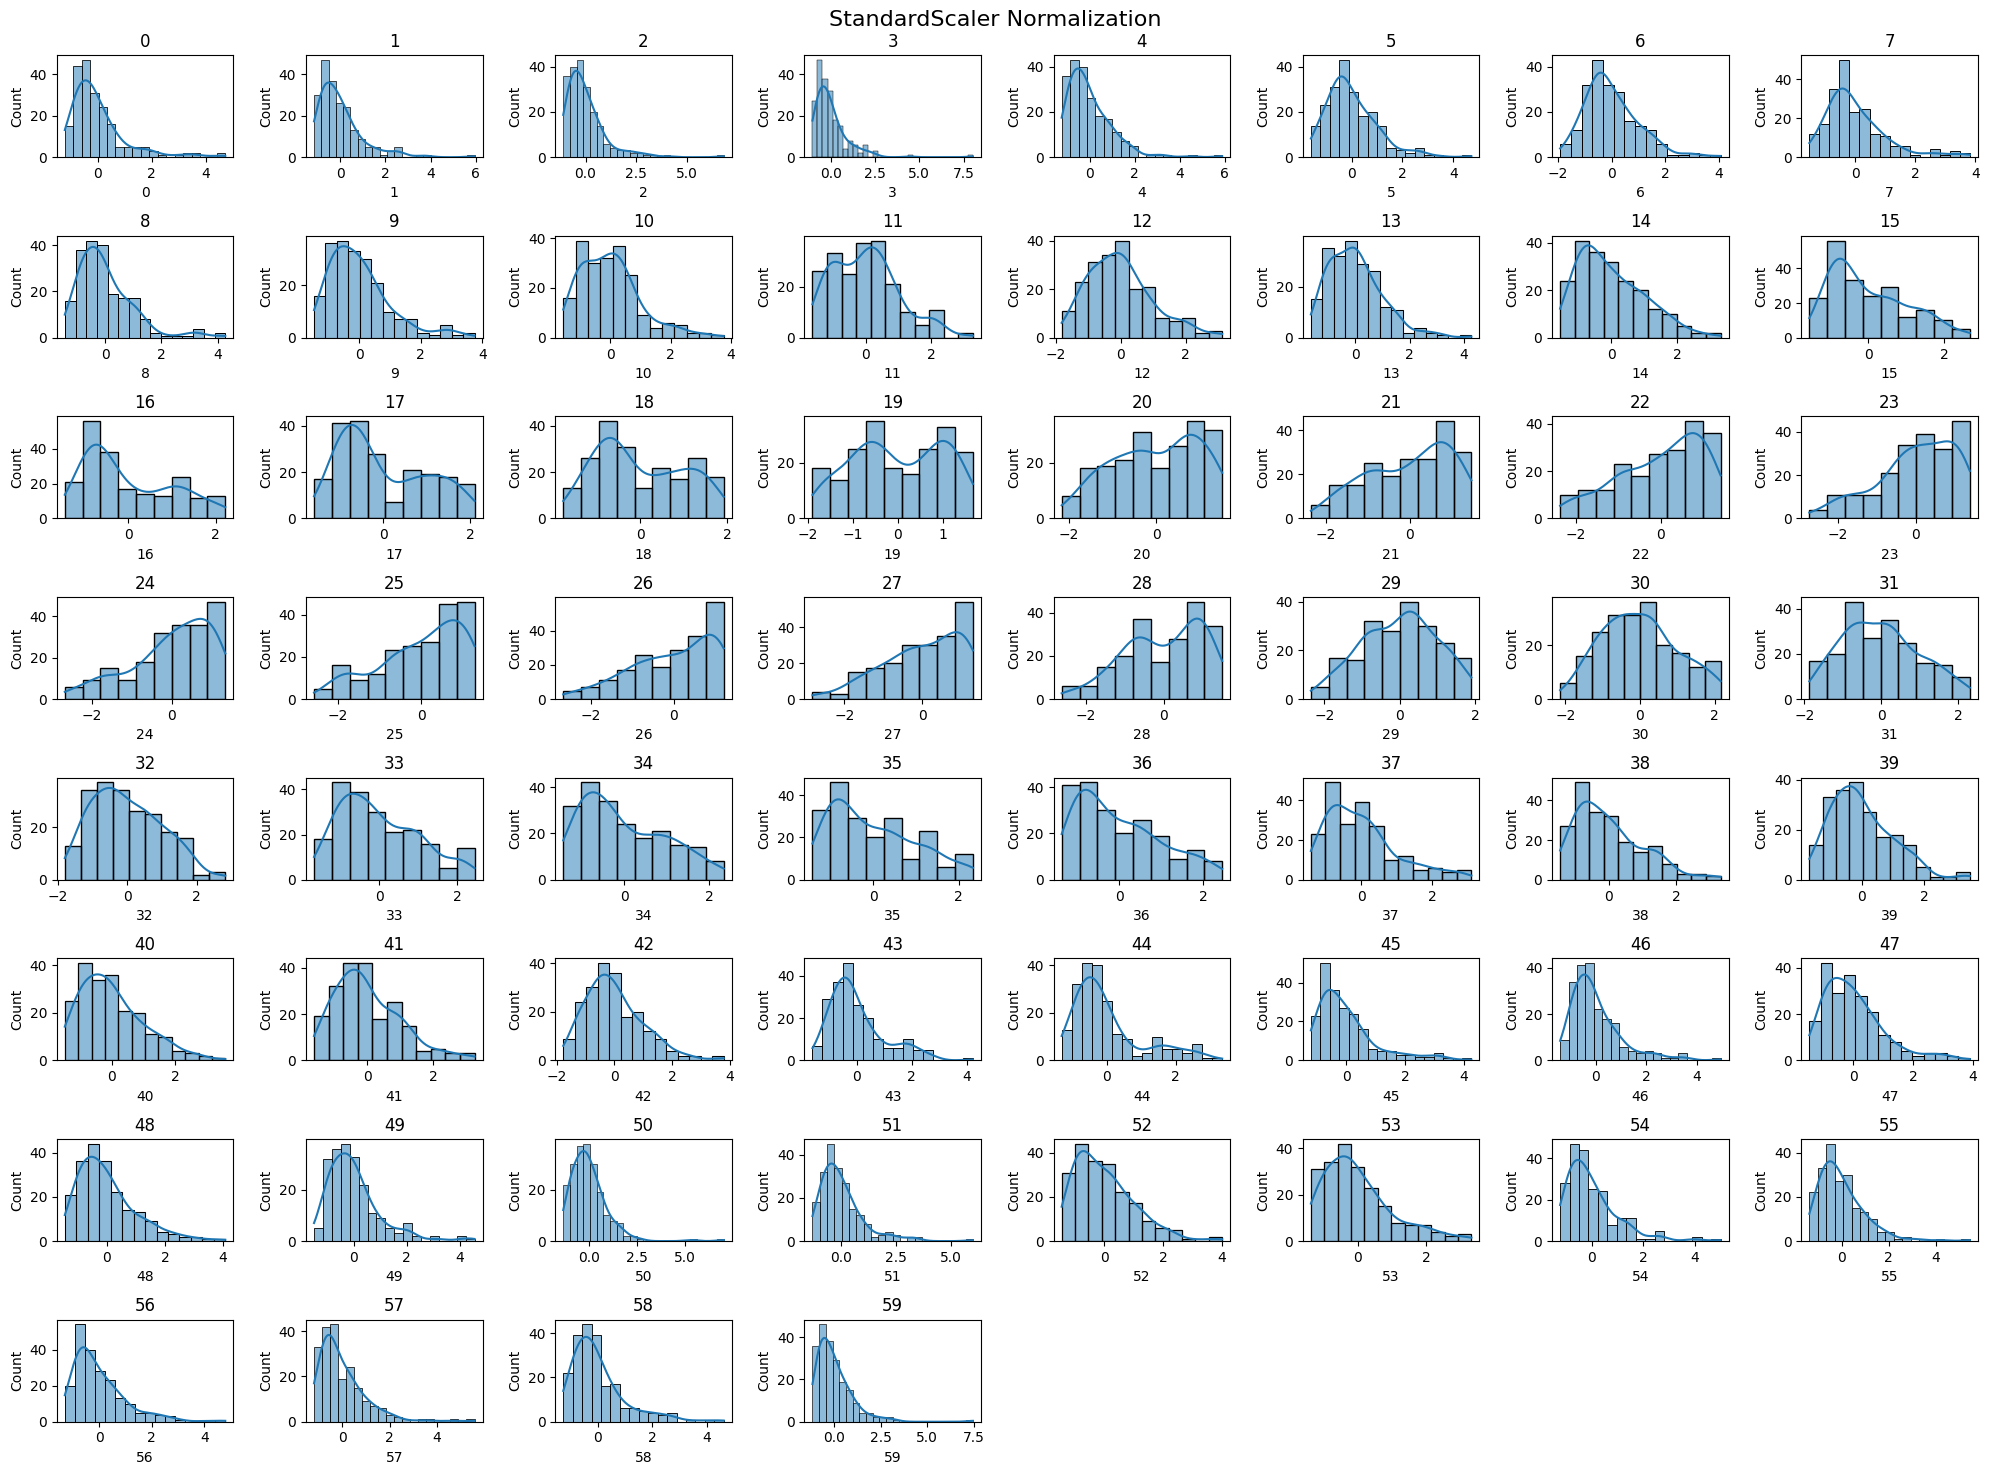

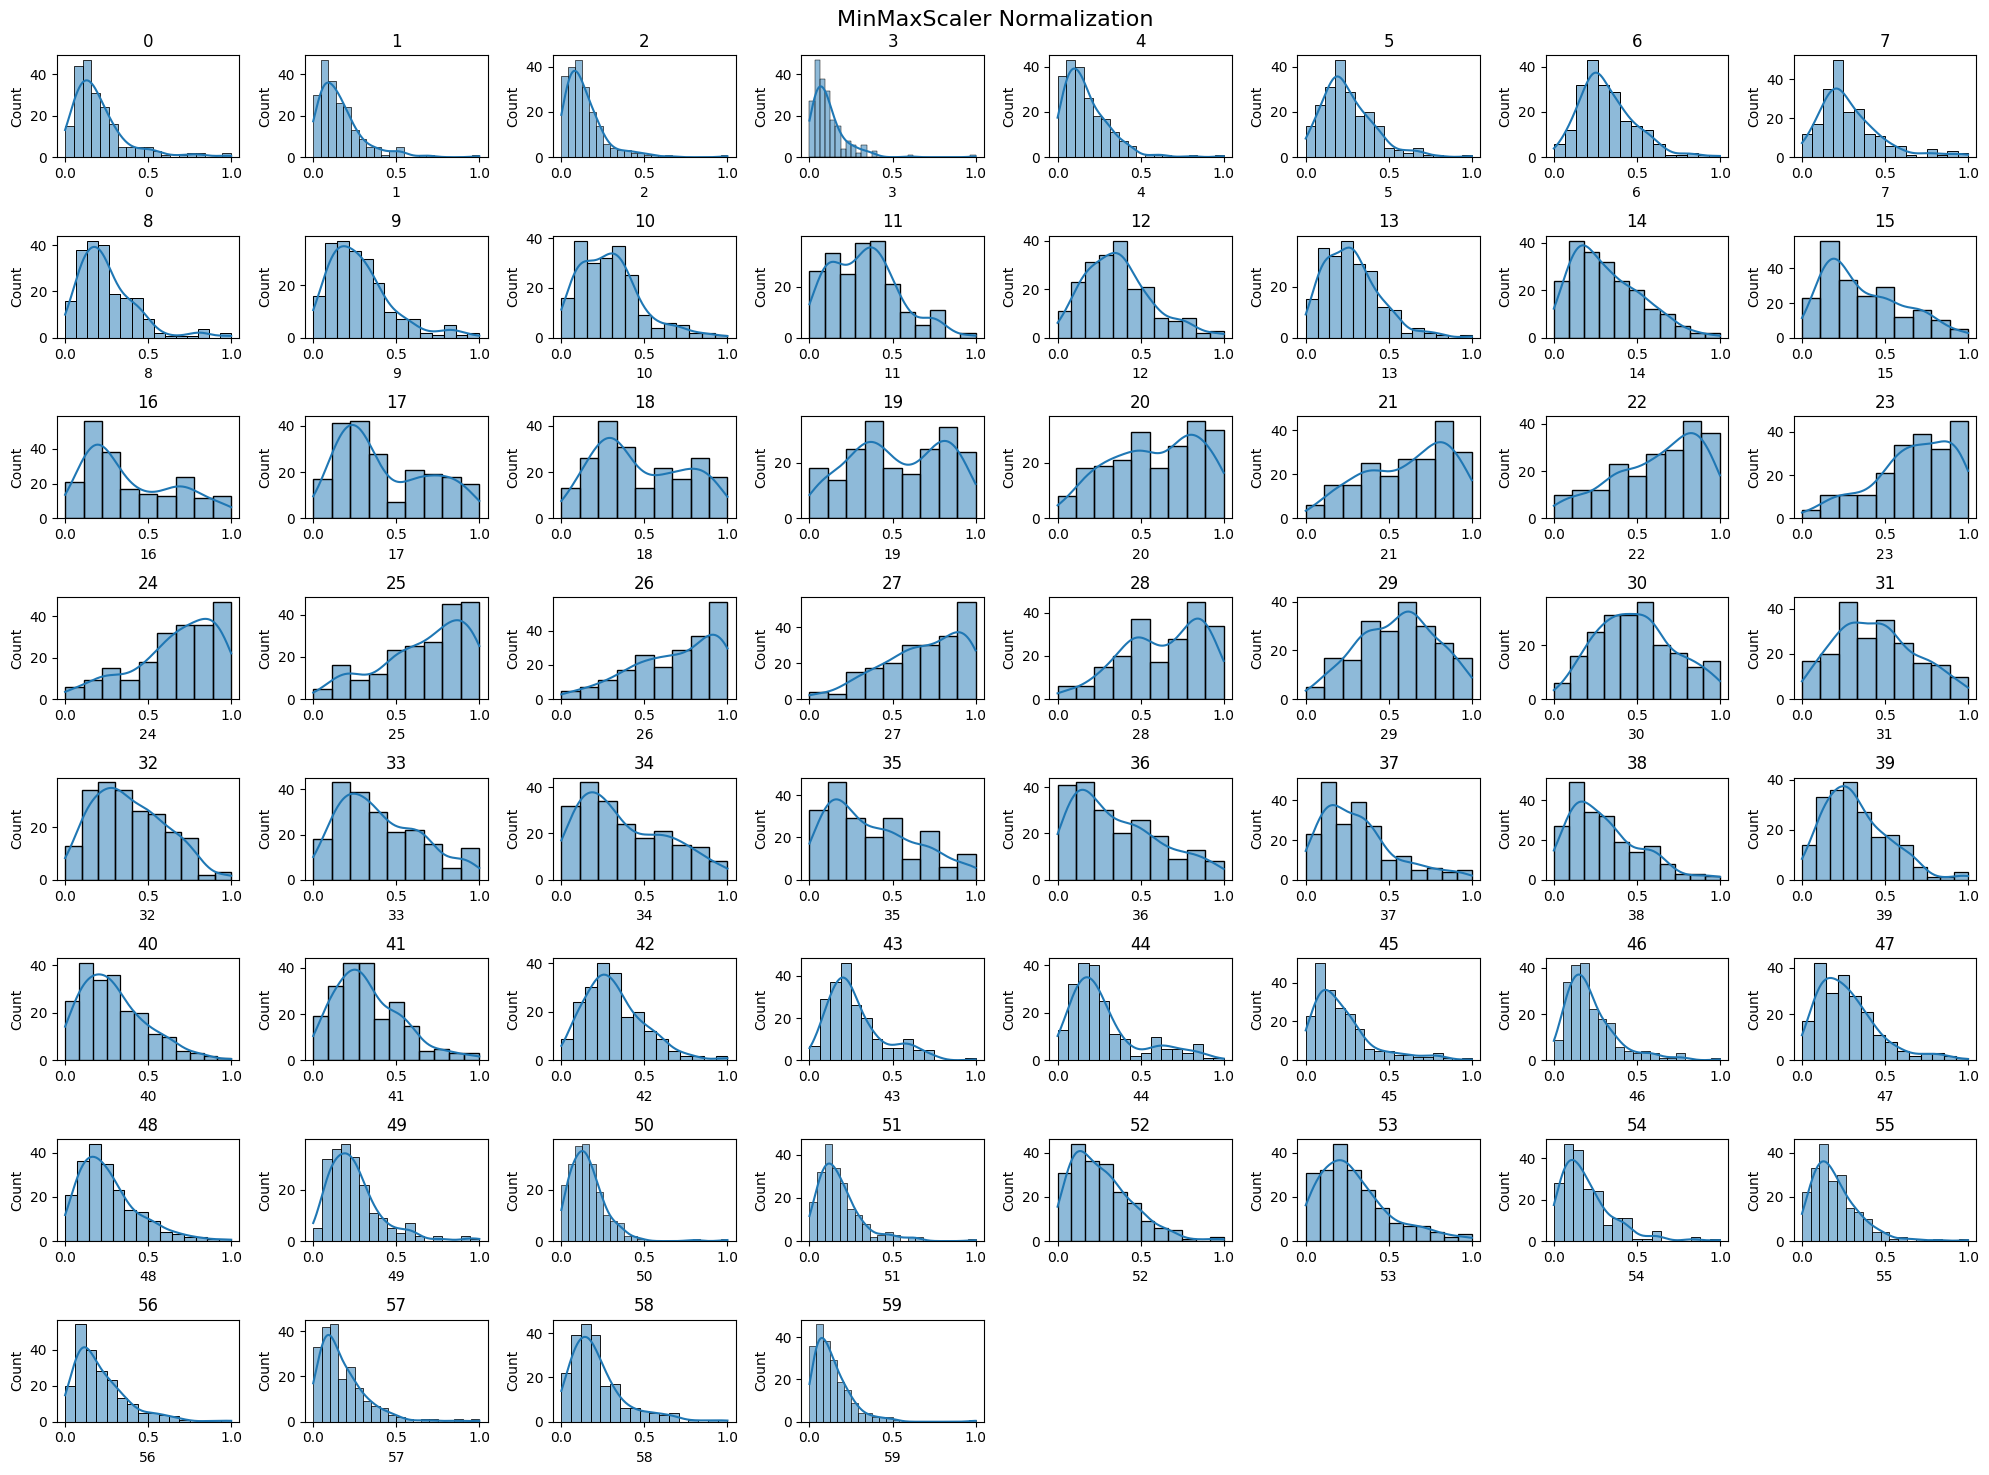

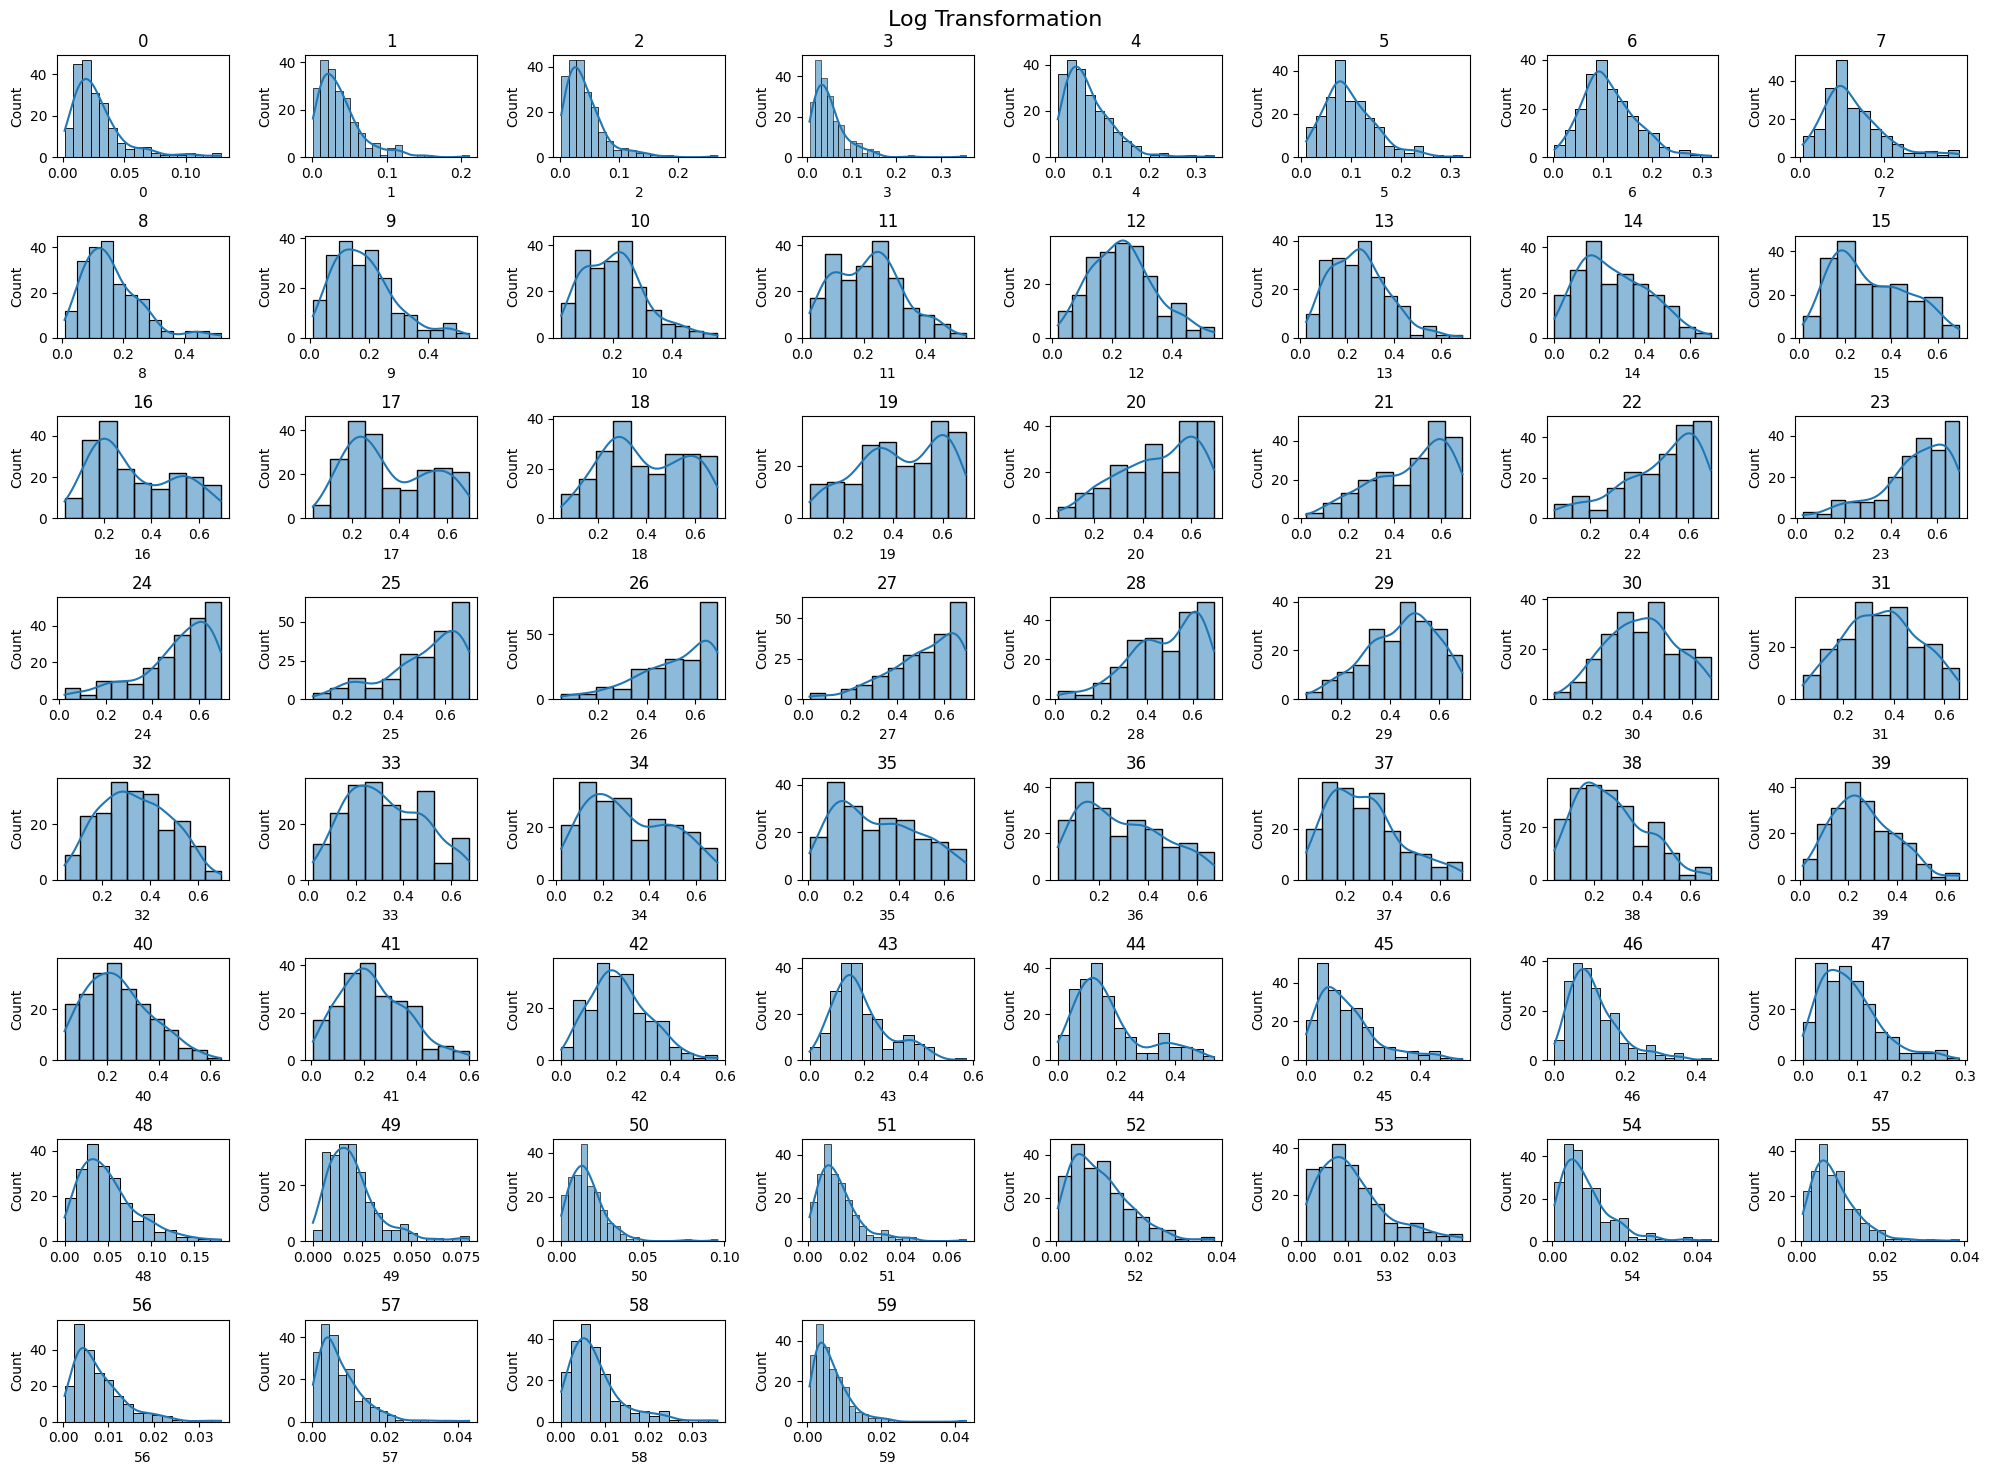

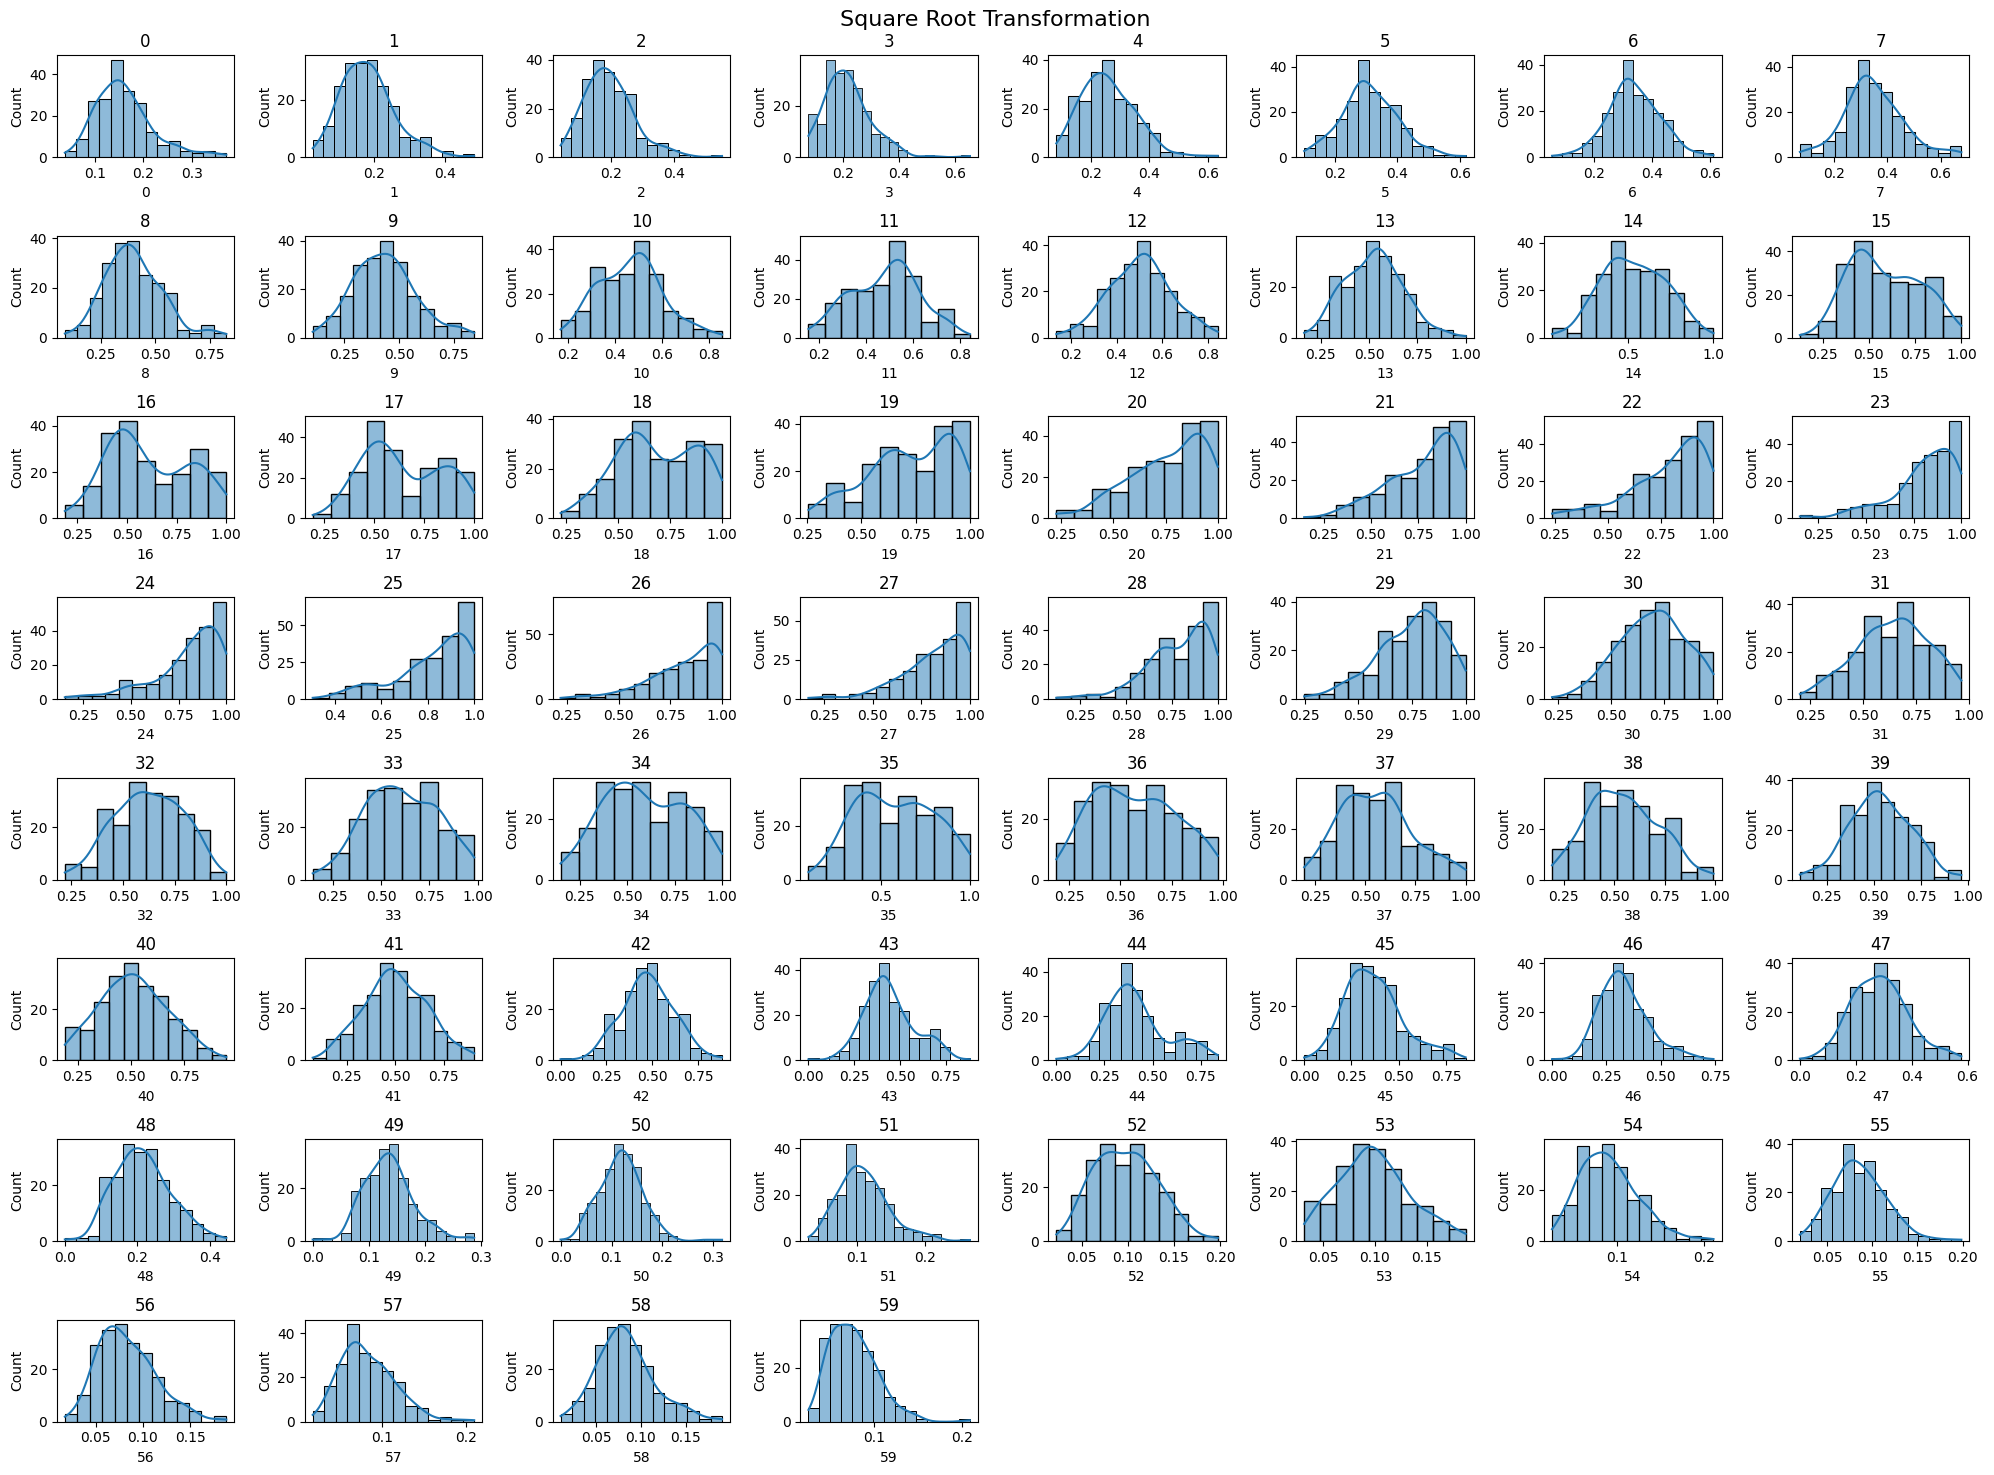

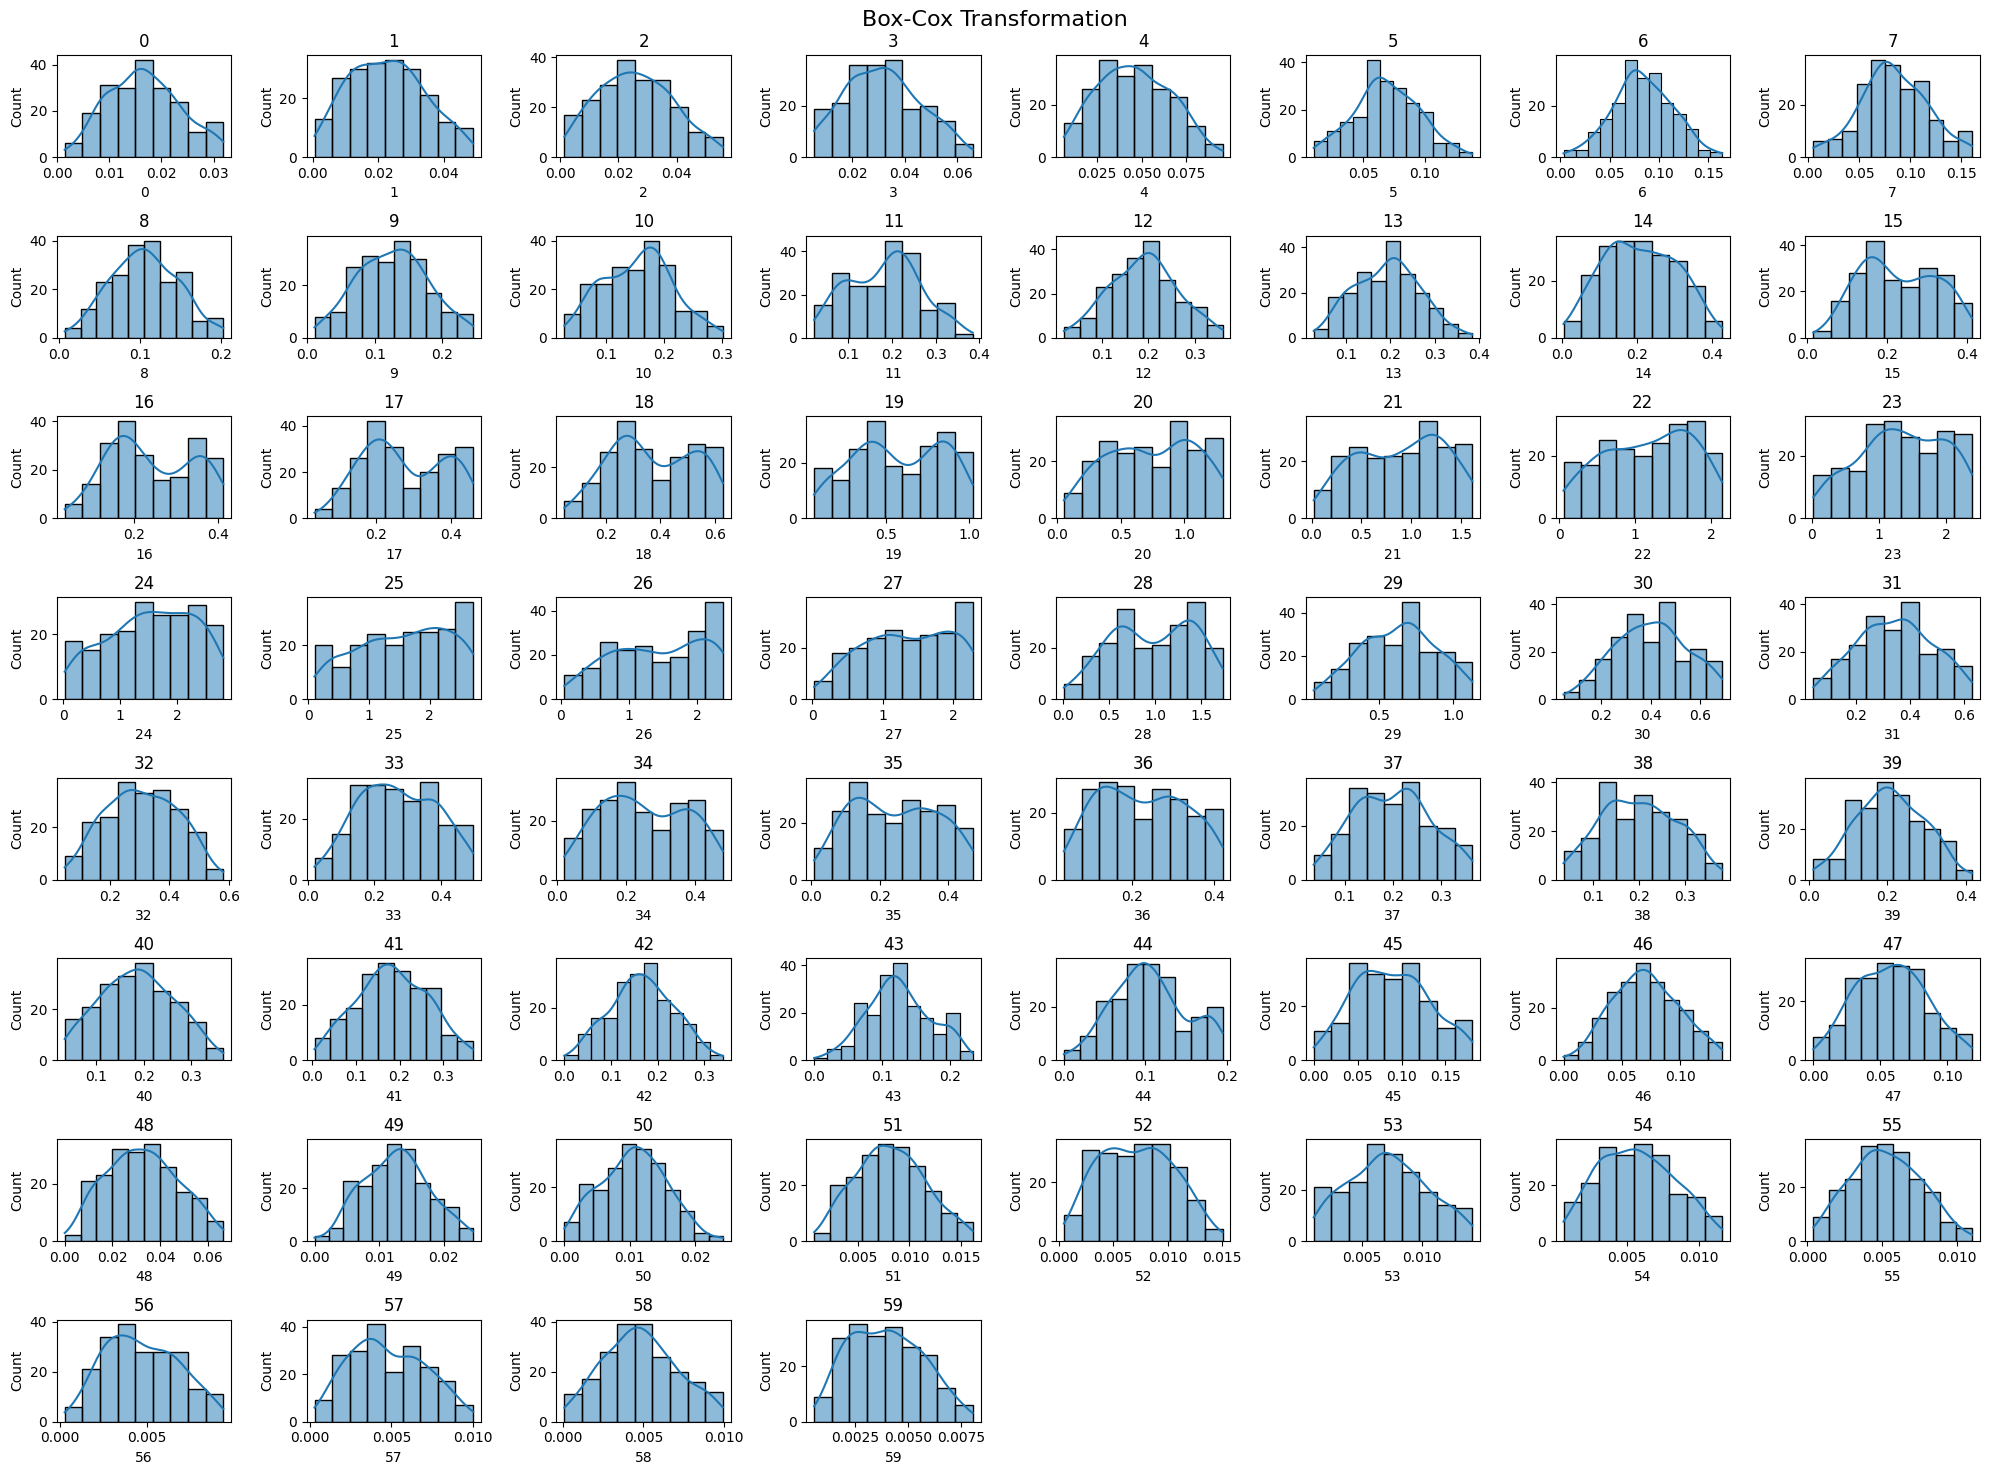

In [47]:
def normalize_data(df):
    # Separate features and target
    X = df.iloc[:, :-1]  # All columns except the last
    y = df.iloc[:, -1]   # Last column (target)

    # Create copies for different normalization techniques
    X_standard = X.copy()
    X_minmax = X.copy()
    X_log = X.copy()
    X_sqrt = X.copy()
    X_boxcox = X.copy()

    # StandardScaler (Z-score normalization)
    scaler = StandardScaler()
    X_standard[:] = scaler.fit_transform(X)

    # MinMaxScaler
    minmax_scaler = MinMaxScaler()
    X_minmax[:] = minmax_scaler.fit_transform(X)

    # Log transformation (adding 1 to avoid log(0))
    X_log[:] = np.log1p(X)

    # Square root transformation
    X_sqrt[:] = np.sqrt(X)

    # Box-Cox transformation
    for column in X_boxcox.columns:
        X_boxcox[column], _ = boxcox(X_boxcox[column] + 1)  # Adding 1 to handle zero values

    # Function to plot histograms
    def plot_histograms(data, title):
        plt.figure(figsize=(20, 15))
        for i, col in enumerate(data.columns):
            plt.subplot(8, 8, i+1)
            sns.histplot(data[col], kde=True)
            plt.title(col)
        plt.tight_layout()
        plt.suptitle(title, fontsize=16)
        plt.subplots_adjust(top=0.95)
        plt.show()

    # Plot histograms for each normalization technique
    plot_histograms(X, "Original Data")
    plot_histograms(X_standard, "StandardScaler Normalization")
    plot_histograms(X_minmax, "MinMaxScaler Normalization")
    plot_histograms(X_log, "Log Transformation")
    plot_histograms(X_sqrt, "Square Root Transformation")
    plot_histograms(X_boxcox, "Box-Cox Transformation")

    # Return all normalized dataframes
    return {
        'original': X,
        'standard': X_standard,
        'minmax': X_minmax,
        'log': X_log,
        'sqrt': X_sqrt,
        'boxcox': X_boxcox
    }, y

# Usage
normalized_data, target = normalize_data(df)

In [48]:
def train_and_evaluate_model(df):
    # Separate features and target
    X = df.iloc[:, :-1]  # All columns except the last
    y = df.iloc[:, -1]   # Last column (target) 

    # Normalize the features using StandardScaler
    scaler = StandardScaler()
    X_normalized = scaler.fit_transform(X)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

    # Create and train the logistic regression model
    model = LogisticRegression(random_state=42)
    model.fit(X_train, y_train)

    # Make predictions on training and testing data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Testing Accuracy: {test_accuracy:.4f}")

    return model, train_accuracy, test_accuracy

# Assuming your DataFrame is named df
model, train_accuracy, test_accuracy = train_and_evaluate_model(df)

Training Accuracy: 0.9337
Testing Accuracy: 0.8095


In [49]:
def train_and_evaluate_model(df):
    # Separate features and target
    X = df.iloc[:, :-1]  # All columns except the last
    y = df.iloc[:, -1]   # Last column (target)

    # Apply Box-Cox transformation to each feature
    X_boxcox = pd.DataFrame()
    for column in X.columns:
        # Add a small constant to make all values positive
        min_val = X[column].min()
        if min_val <= 0:
            X[column] = X[column] - min_val + 1e-5

        # Apply Box-Cox transformation
        with warnings.catch_warnings():
            warnings.filterwarnings('ignore')
            X_boxcox[column], _ = boxcox(X[column])

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_boxcox, y, test_size=0.2, random_state=42)

    # Create and train the logistic regression model
    model = LogisticRegression(random_state=42)
    model.fit(X_train, y_train)

    # Make predictions on training and testing data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Testing Accuracy: {test_accuracy:.4f}")

    return model, train_accuracy, test_accuracy

# Assuming your DataFrame is named df
model, train_accuracy, test_accuracy = train_and_evaluate_model(df)

Training Accuracy: 0.8735
Testing Accuracy: 0.8571
